In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R

install.packages('dplyr')
install.packages('ggplot2')
devtools::install_github("topepo/AmesHousing")


# 1. Inferente Bayesiene

Inferența bayesiană este o metodă de inferență statistică în care teorema lui Bayes este utilizată pentru a actualiza probabilitatea unei ipoteze pe măsură ce devin disponibile mai multe dovezi sau informații.

## Definitia matematica a Teoremei lui Bayes

P(A|B) = P(B|A) * P(B) / P(A)

P(A|B) este probabilitatea ca evenimentul A sa se intample daca s-a intamplat evenimentul B

P(B|A) este probabilitatea ca evenimentul B sa se intample daca s-a intamplat evenimentul A

P(A) si P(B) sunt probabilitatile ca evenimentele A si B sa se intample

## Exemplu

Consideram ca se alege o carte dintr-un pachet cu 52 de carti. Stim ca jumatate dintre carti sunt rosii si cealalta jumatate sunt negre.
Care este probabilitatea ca valoarea de pe o carte sa fie 4, daca stim ca e o carte rosie?

Pentru a transforma in simboluri matematice, putem spune:
- A este evenimentul de a alege un 4
- B este evenimentul de a alerge o carte rosie
- P(B|A) - probabilitatea de a alege o carte 4 care e rosie
- P(A|B) este P(4|rosie)

Calculand folosind teorema lui Bayes:

P(B|A) = P(rosie|4) = 1/2
P(A) = P(4) = 4/52 = 1/13
P(B) = P(rosie) = 1/2


P(4|rosie) = P(rosie|4) * P(rosie) / P(4) = (1/2 * 1/13) / (1/2) = 1/13 


##Inferența Bayesiană

Să luăm un alt exemplu: Care e probabilitatea de a vinde înghețată, indiferent de vremea de afară?

Matematic, ce vrem să calculăm este:
P(A=vândut_înghețată | B=vreme_afară)

P(A) este expresia pe care o știm de dinainte. Considerând că deja știm că un eșantion de 30 din 100 de oameni cumpără înghețată. Putem pleca inițial de la presupunerea că probabilitatea este 0.3, dar nu este o valoare sigură. Poate fi la fel de bine 0.25 sau 0.4. În acest caz, avem o distribuție de probabilități. Acestea se folosesc des atunci când lucrăm cu modele.

## Modele în teorema lui Bayes

În definiția teoremei lui Bayes de mai sus am folosit evenimentele A și B, dar atunci când folosim modele în teorema lui Bayes, sunt adesea folosite diferite simboluri.

Simbolul pentru evenimentul definit mai sus ca  A, este Θ (Theta). Theta este ceea ce ne interesează, reprezintă setul de parametri. Deci, dacă vrem să estimăm valorile parametrilor unei distribuții Gaussiene, Θ reprezintă și media, și deviația standard, σ (matematic Θ = {μ, σ}).

În locul evenientului B, vedem date sau y = {y1, y2, …, yn}. Aceasta reprezintă setul de observații pe care îl avem.

Teorema lui Bayes, în formă de model, devine:

P(Θ|data) = P(data|Θ) * P(Θ) / P(data)

## Exemplu

Vrem să calculăm lungimea cât mai exactă a unei legături de hidrogen, pe măsură ce primim mai multe date.

Să presupunem că lungimea unei legături de hidrogen este de 3.2Å — 4.0Å. ( Ångström, Å, este egal cu 0.1 nanometri). Informația acesta este cunoscută apriori. În termeni de distribuție de priorități, este echivalent cu o distribuție Gaussiană cu media μ = 3.6Å și deviația standard σ = 0.2Å.
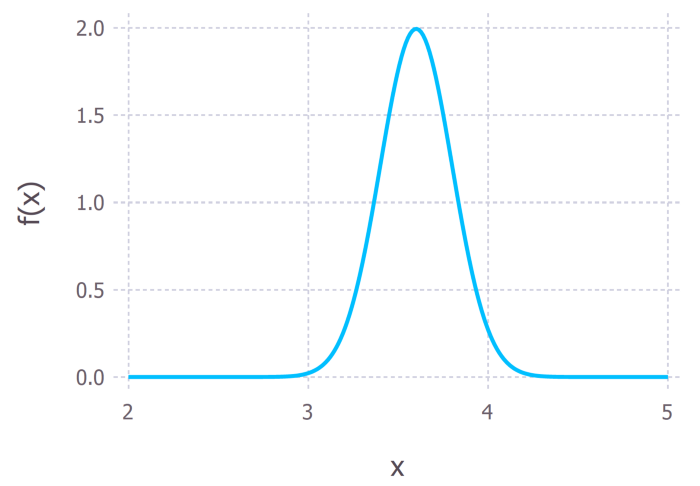

La pasul următor, primim 5 dimensiuni posibile, date noi, observate (y). În caz teoretic, putem presupune că cele 5 puncte sunt geenrate random folosind o distribuție gaussiană. Pe baza lor, putem crea o altă curbă gaussiană, prin care obținem probabilitatea de alegere a datelor. În imaginea de mai jos, avem desenate cu albastru informațiile cunoscute apriori și cu auriu distribuția de probabilități pentru valorile random alese.

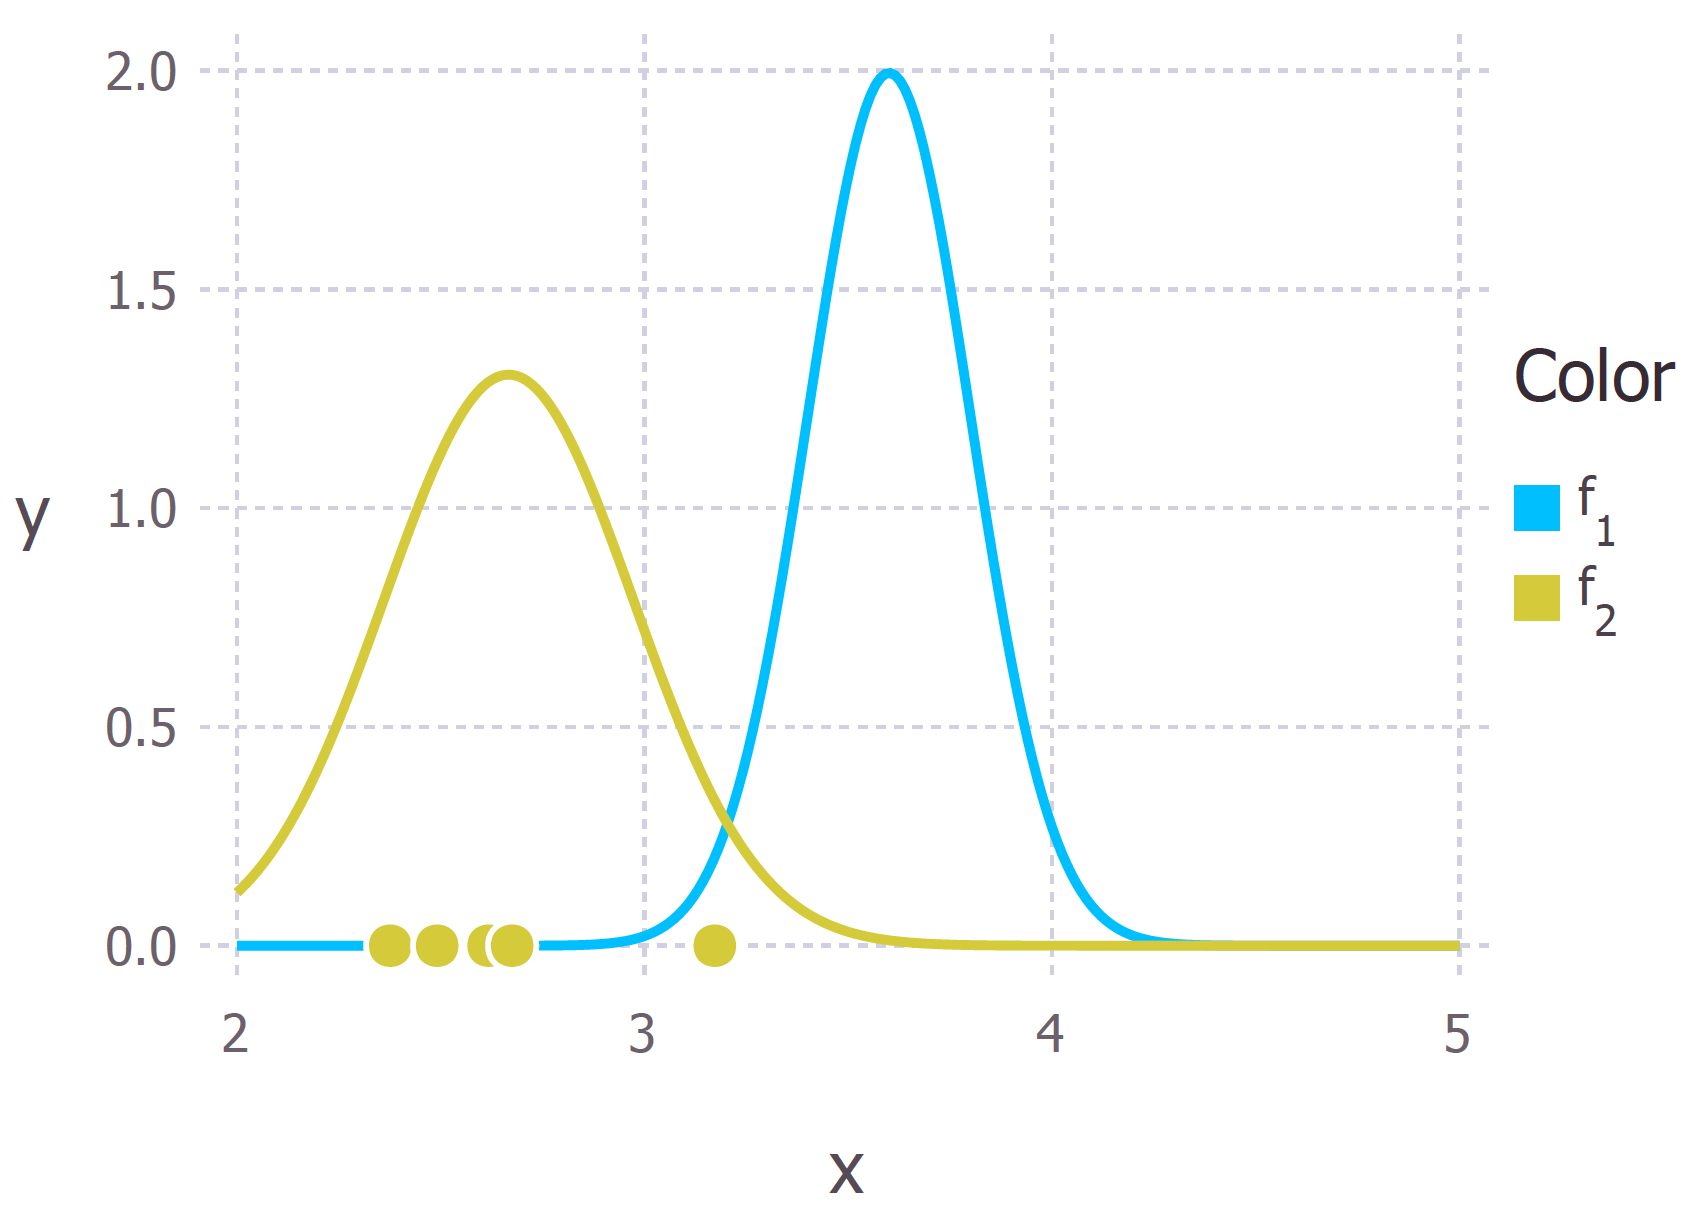 

Acum avem 2 distribuții gaussiene, cu albastru avem cunoștiințele apropri și cu auriu distribuția de probabilități. Ceea ce trebuie să calculăm este este distribuția posterioară.

Șim că ecuația care reprezintă densitatea de probabilitate gaussiană este:
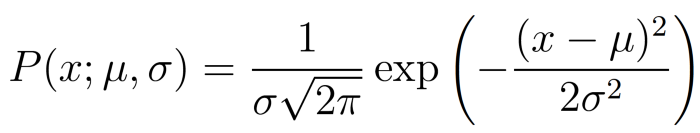


înmulțind cele 2 distribuții definite prin ecuația de mai sus, obținem distribuția desenată cu roz  mai jos: 
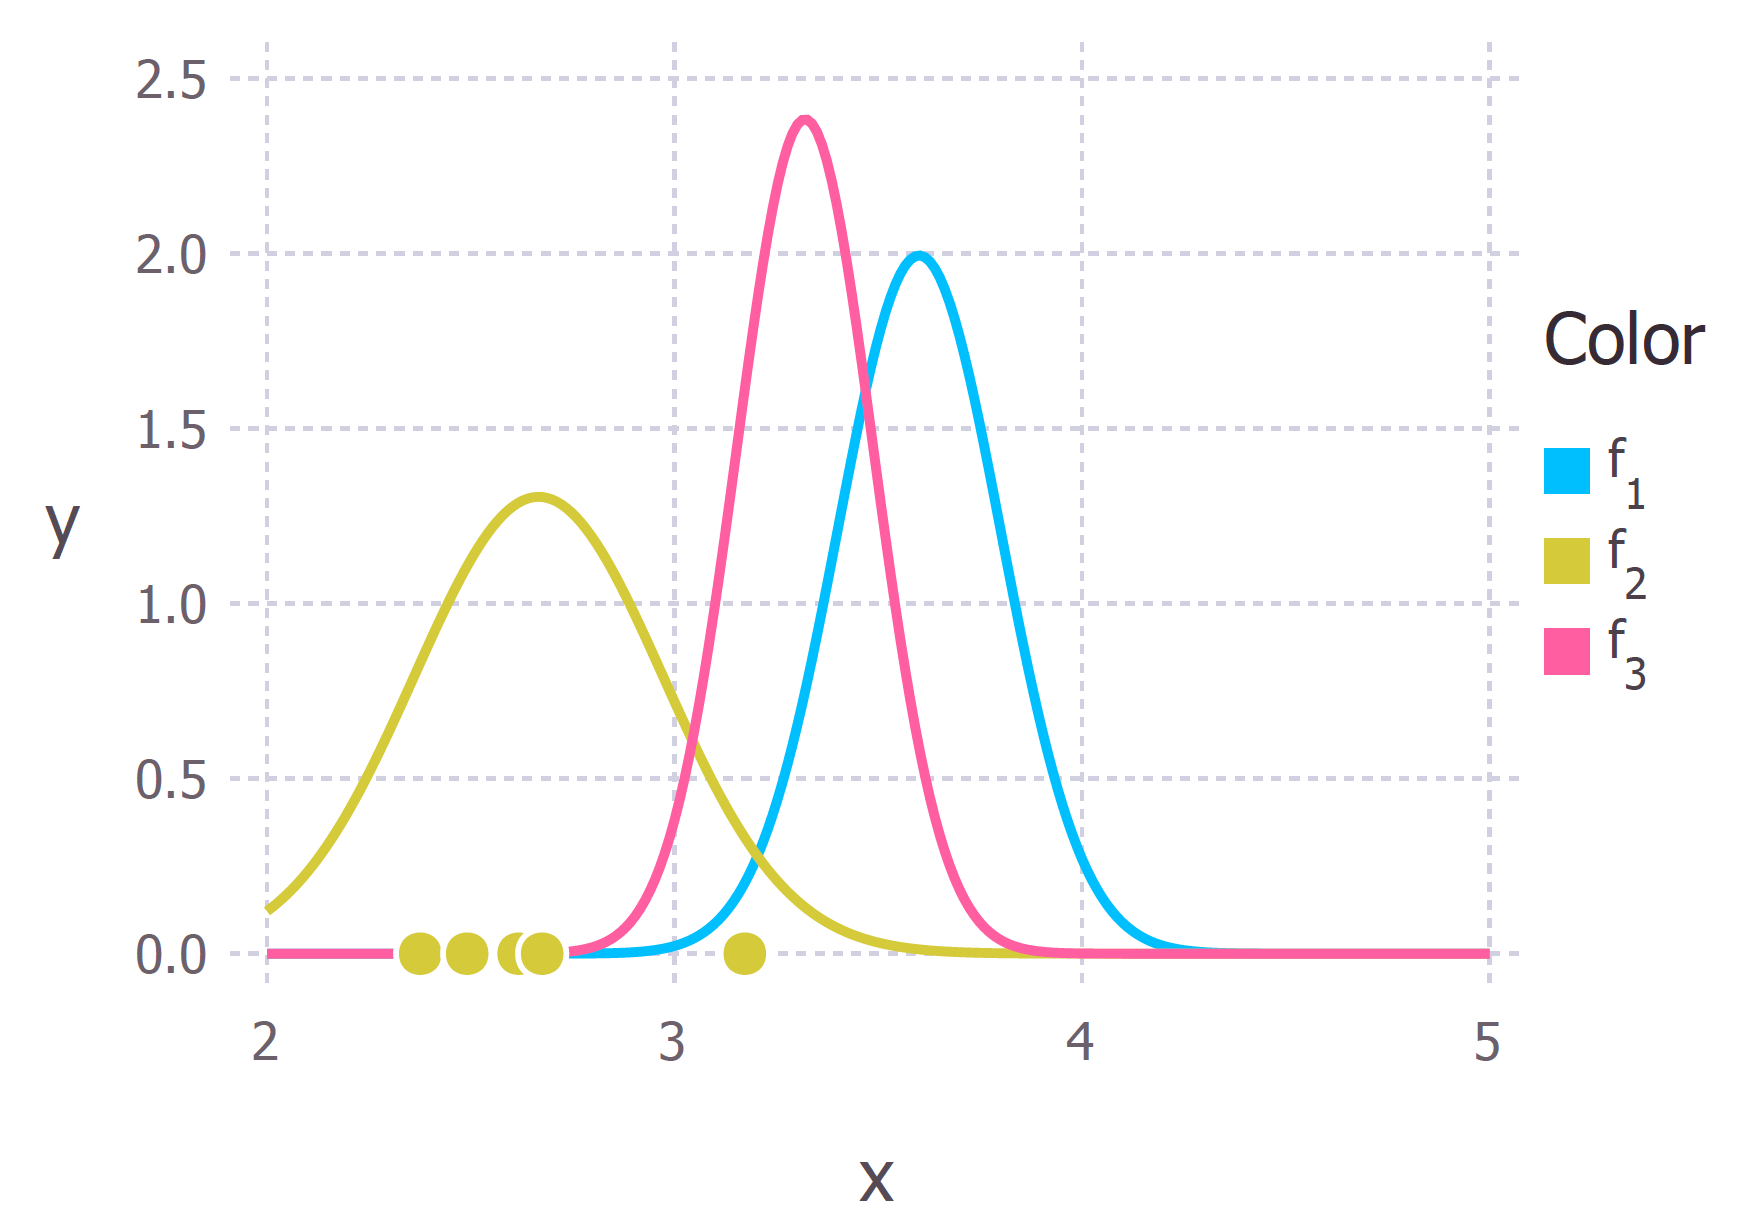

# Exemplu cu aruncarea unei monede în R


Având numărul de aruncări și numărul de dăți inițial când a picat banul (b), putem folosi inferența bayesiană pentru a obține o histogramă a probabilităților de a da 'ban' (p) în mai multe experimente.

1) Setăm o valoare pentru p:



In [ ]:
%%R

p<-runif(1, 0, 1) 
p

[1] 0.6716071


2) Propunem o nouă valoare p'

In [ ]:
 %%R

 p_prime <- p + runif(1, -0.05, 0.05)  
 p_prime

[1] 0.7132161


3) Calculăm probabilitatea de acceptare a noii valori. Trebuie să verificăm dacă noua valoare îmbunătățește valorile posterioare ale datelor. Aceasta se verifică prin raportul: Pr(p'|h) / Pr(p|h).

Pentru că modelul principal este binomial (aruncarea unei monede), functia de probabilitate Pr(b|p) poate fi definită în R folosing funcția dbinom.
 
Pr(p) este probabilitatea aprori și înseamnă părerile noastre despre ce valori poate lua p. Singurul lucru pe care îl știm este că trebuie să fie o valoare între 0 și 1. Dacă presupunem că toate valorile au aceeași probabilitatem putem defini o distribuție plată, folosind funcția betadistribution în R.

Acum, probabilitatea de acceptanță (R) va fi valoarea minimă: 1 sau raportul probabilităților posterioare, pentru valori diferite ale lui p. Exprimăm ecuația în R ca:


In [ ]:
 %%R
 
 # help(dbinom)  
 likelihood <- function(h, n, p){  
  lh <- dbinom(h, n, p)  
  lh  
 }

 # help(dbeta)  
 dbeta(p, 1, 1)

 R <- likelihood(h,n,p_prime)/likelihood(h,n,p) * (dbeta(p_prime,1,1)/dbeta(p,1,1))  

4) Generăm un număr random uniform între 0 și 1. Dacă acest număr e mai mic decât Rm atunci acceptăm noua valoare pentru p (p') și modificăm p = p'. Altfel, schimbarea va fi ignorată.


In [ ]:
%%R

  if (R > 1) {R <- 1}  
   random <- runif (1, 0, 1)  
  if (random < R) {  
   p <- p_prime  
  }

 5) Păstrăm noua valoare a lui p într-un data frame
 

In [ ]:
%%R

posterior <- data.frame()  
posterior[i,1] <- log(likelihood(h, n, p))  
posterior[i,2] <- p

În final, repetăm pașii de mai multe ori pentru a obține o estimare cât mai exactă a lui p.

In [ ]:
 %%R
 
 # Set the numer of tosses.  
 n <- 100
 # Set the number of heads obtained.  
 h <- 73  
 # Define our likelihood function.   
 # Since our model is a binomial model, we can use:  
 likelihood <- function(h,n,p){  
  lh <- dbinom(h,n,p)  
  lh  
 }  
 # Set the starting value of p  
 p <- runif(1,0,1)  
 # Create an empty data.frame to store the accepted p values for each iteration.  
 # Remember: "the posterior probability is just an updated version of the prior"  
 posterior <- data.frame()  
 # Set the lenght of the loop (Marcov Chain, number of iterations).  
 nrep <- 5000  
 # Start the loop (MCMC)  
 for (i in 1:nrep) {  
  # Obtain a new proposal value for p  
  p_prime <- p + runif(1, -0.05,0.05)  
  # Avoid values out of the range 0 - 1  
  if (p_prime < 0) {p_prime <- abs(p_prime)}  
  if (p_prime > 1) {p_prime <- 2 - p_prime}  
  # Compute the acceptance proability using our likelihood function and the  
  # beta(1,1) distribution as our prior probability.  
  R <- likelihood(h,n,p_prime)/likelihood(h,n,p) * (dbeta(p_prime,1,1)/dbeta(p,1,1))  
  # Accept or reject the new value of p  
  if (R > 1) {R <- 1}  
   random <- runif (1,0,1)  
  if (random < R) {  
   p <- p_prime  
  }  
  # Store the likelihood of the accepted p and its value  
  posterior[i,1] <- log(likelihood(h, n, p))  
  posterior[i,2] <- p  
  print(i)  
 }  

Putem plota rezultatele.
Observăm că probabilitatea de a obține 'ban' e aproximativ 0.7.

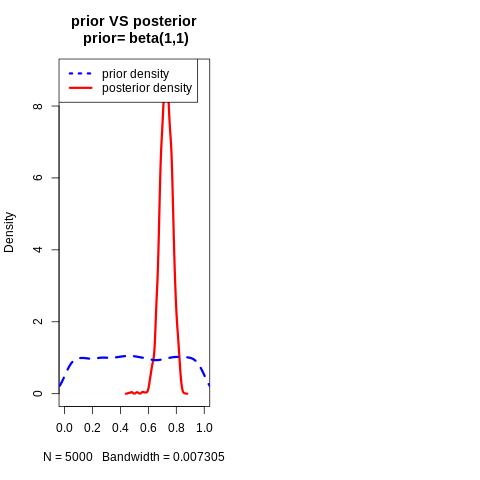

In [ ]:
 %%R

 par(mfrow= c(1,2))  
 prior <- rbeta(5000, 1,1)
 plot(density(posterior$V2), xlim = c(min(min(prior),min((posterior$V2))), max(max(prior),max((posterior$V2)))),   
    ylim = c(0, max(max(density(prior)$y),max((density(posterior$V2)$y)))), main= "prior VS posterior\n prior= beta(1,1)",  
    lwd=3, col="red")  
 lines(density(prior), lwd=3, lty=2, col="blue")  
 legend("topleft", legend=c("prior density","posterior density"),  
     col=c("blue","red"), lty=c(3,1), lwd=c(3,3), cex = 1)  

# 2. Inferențe statistice

Inferențele statistice ne ajută să tragem concluzii din eșantioane pentru a estima parametrii unei populații. Eșantionul nu este o reprezentare exactă a unei populații, deci trebuie să ne așteptăm la rezultate aproximative.

1. Vom folosi exemplul 'Ames'; 'IA home sales data' oferit de R. Vom presupune că acest set de date (ames_pop) reprezintă întreaga populație și vom extrage sample-uri de acolo pentru a putea face inferențe.

In [ ]:
%%R

# packages used regularly
library(dplyr)
library(ggplot2)
# full population data
ames_pop <- AmesHousing::make_ames()

# reproducibility
set.seed(123)

# creating samples
ames_sample <- sample_frac(ames_pop, .5)


2. O estimare a intervalului de încredere a unui parametru de populație constă dintr-un interval de numere produse de o estimare punctuală și un nivel de încredere asociat, care specifică probabilitatea ca intervalul să conțină parametrul. Majoritatea intervalelor de încredere iau forma generală
> `estimare punctuală ± eroare marginală`

unde marja de eroare este o măsură a preciziei estimării intervalului. Marja mai mică de erori indică o precizie mai mare. De ce este important să încorporezi această marjă de eroare atunci când lucrezi cu un eșantion? După cum puteți vedea, prețul mediu de vânzare pentru întregul set de date ames (populația) este de 180.796.

Cu toate acestea, atunci când lucrăm cu subseturi ale acestor date, vom obține valori medii ușor diferite. Eșantionul nostru inițial de date ames, care conține 50% din observațiile populației, are un alt preț mediu de vânzare.

In [ ]:
%%R

mean(ames_pop$Sale_Price)

mean(ames_sample$Sale_Price)


[1] 180121.7


Din păcate, atunci când lucrăm cu eșantioane, nu avem de obicei datele despre populație cu care să comparăm, așa că trebuie să estimăm un interval de încredere pentru media populației noastre folosind doar informații din eșantionul nostru. Pentru a calcula un interval de încredere putem folosi intervalul t, care produce intervale de încredere fiabile atâta timp cât populația noastră provine dintr-o distribuție normală sau dimensiunea eșantionului este mare. Ecuația de mai jos reprezintă intervalul nostru t

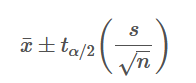

unde media sample-ului ¯x este estimarea punctuală și cantitatea tα/2(s√n) este eroarea marginală. tα/2 urmărește o distribuție t și e asociat cu nivelul de încredere, specificat de analist.

Folosind eșantionul nostru original de date `ames`, putem calcula intervalul de încredere de 95%. Rețineți că putem folosi `qt (.975, df = length (x) - 1)` care calculează tα/2.

In [ ]:
%%R

# original ames sample data
set.seed(123)
ames_sample <- sample_frac(ames_pop, .5)

# compute equation parameters
x <- ames_sample$Sale_Price
xbar <- mean(x)                        # mean 
multi <- qt(.975, df = length(x) - 1)  # multiplier
sigma <- sd(x)                         # standard deviation
denom <- sqrt(length(x))               # square root of n

# compute standard error
se <- multi * (sigma / denom)

# lower and upper confidence boundary
xbar + c(-se, se)
## [1] 176802.0 184944.1

[1] 175869.1 184374.2


Din păcate, R nu are o funcție încorporată pentru a calcula intervalele de încredere medii. Am putea dezvolta o funcție pentru aceasta sau putem folosi doar funcția t.test încorporată, care oferă intervale de încredere, împreună cu alte informații.

In [ ]:
%%R

t.test(ames_sample$Sale_Price)
## 
## 	One Sample t-test
## 
## data:  ames_sample$Sale_Price
## t = 87.151, df = 1464, p-value < 0.00000000000000022
## alternative hypothesis: true mean is not equal to 0
## 95 percent confidence interval:
##  176802.0 184944.1
## sample estimates:
## mean of x 
##    180873


	One Sample t-test

data:  ames_sample$Sale_Price
t = 83.084, df = 1464, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 175869.1 184374.2
sample estimates:
mean of x 
 180121.7 



3. Reducerea erorii marginale

Eroarea marginală este reprezentată de `tα/2(s√n)` și determină dimensiunea intervalului de încredere. Cu cât este mai mică eroarea, cu atât este mai precisă estimarea.

Eroarea marginlă este compusă din 3 proprietăți:


*   `tα/2`, care depinde de nivelul de încredere și de dimensiunea sample-ului
*   `s`, deviația standard, caracteristică a datelor
*   `n`, dimensiunea sample-ului

Creșterea dimensiunii eșantionului este singura modalitate de a reduce marja de eroare menținând în același timp un nivel constant de încredere. În esență, creșterea dimensiunii eșantionului înseamnă doar că se colectează mai multe observații de la populație și pe măsură ce se adaugă mai multe observații, media eșantionului va fi o reprezentare mai bună a mediei populației.

Putem ilustra acest lucru prin eșantionarea de la 2,3,…, n observații din populația ames și calculând media eșantionului. După cum demonstrează figura de mai jos, pe măsură ce dimensiunea eșantionului se apropie de dimensiunea populației, valorile medii converg cu media reală a populației.







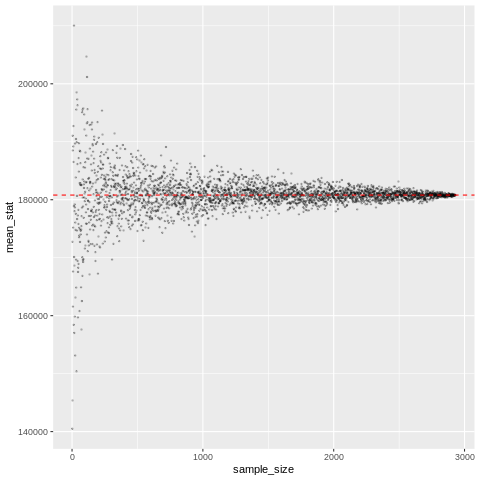

In [ ]:
%%R

sample_size <- 2:nrow(ames_pop)

results <- tibble(
  sample_size = sample_size, 
  mean_stat = 0
  )

for(i in seq_along(sample_size)) {
  sample <- sample_n(ames_pop, sample_size[i])
  mean_stat <- mean(sample$Sale_Price)
  results[i, 2] <- mean_stat
}

ggplot(results, aes(sample_size, mean_stat)) +
  geom_point(alpha = .25, size = .5) +
  geom_hline(yintercept = mean(ames_pop$Sale_Price), color = "red", lty = "dashed")

# Exerciții




## 1. Companie de livrat pește

O companie de livrat pește încearcă acum să intre pe piața daneză profitabilă prin vânzarea abonamentelor un an. Departamentul de marketing a făcut un studiu pilot și a încercat două metode de marketing diferite:

A) Trimiterea unui e-mail cu o broșură colorată care invită oamenii să se înscrie pentru un abonament de un an.

B) Trimiterea unei broșuri colorate care invită oamenii să se înscrie pentru un abonament de un an și care include un somon gratuit.

S-au trimis 16 mailuri de tipul A si 16 de tipul B. 4 oameni care au primit un mail de tipul A si 8 care au primit un mail de tipul B au ales sa se aboneze.

Pornind de la scheletul de cod de mai jos, construiți un model Bayesian care răspunde la întrebarea dacă metoda A este mai bună decât metoda B?




[1] 0.2598128


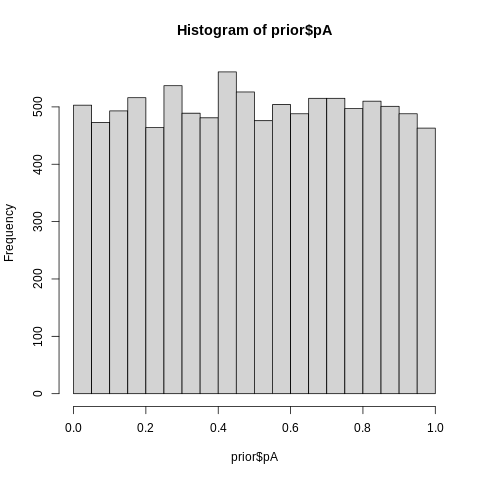

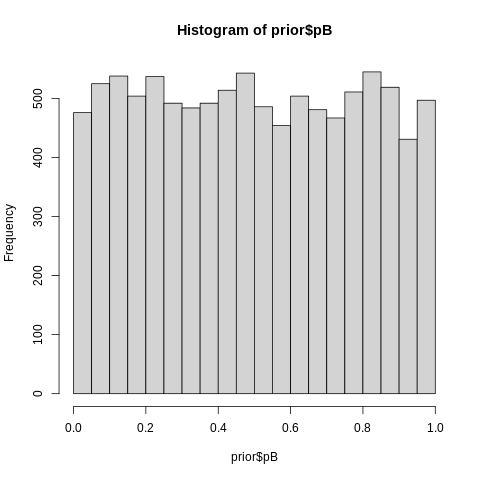

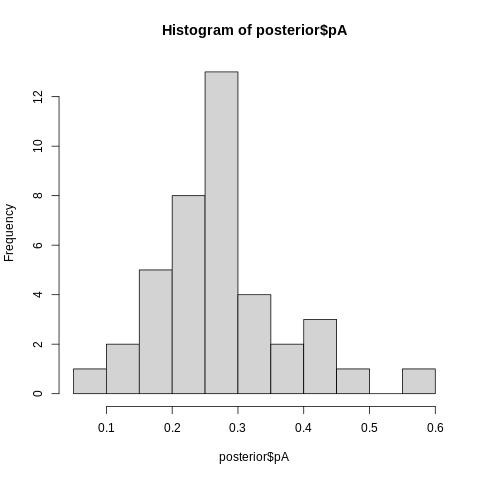

In [ ]:
%%R
#Number of random draws from the prior
n_draws <- 10000

# TODO Here you sample n_draws draws from the prior
# TODO name the columns pA and pB
# TODO use data.frame to store information for both methods   
prior <- data.frame(pA = runif(n_draws, 0, 1), pB = runif(n_draws, 0, 1))
hist(prior$pA)
hist(prior$pB)

# Here you define the generative model
generative_model <- function(pA, pB) {
  subscribersA <- rbinom(1, 16, pA)
  subscribersB <- rbinom(1, 16, pB)
  c(subscribersA = subscribersA, subscribersB = subscribersB)
}

# Here you simulate data using the parameters from the prior and the 
# generative model
sim_data <- rep(NA, n_draws)
# TODO complete new sim data
# TODO sim_data should be a dataframe to easily access its columns
# TODO in case it's easier, replace for with sapply
sim_data <- data.frame(t(sapply(1:n_draws, function(i) {
    generative_model(prior$pA[i], prior$pB[i])
})))

# Here you filter off all draws that do not match the data.
#TODO change the observed_data based on the prior data
posterior <- prior[sim_data$subscribersA == 4 & sim_data$subscribersB == 8, ] 

hist(posterior$pA) # Eyeball the posterior
length(posterior$pA) # See that we got enought draws left after the filtering.
                  # There are no rules here, but you probably want to aim
                  # for >1000 draws.

# Now you can summarize the posterior, where a common summary is to take the mean
median(posterior$pA)


## 2. Schimbarea informațiilor cunoscute a priori

Departamentul de marketing începe să creadă că a fost o întâmplare faptul că o proporție atât de mare s-a înscris. Pe toate celelalte piețe europene, proporția care se înscrie pentru un abonament anual de somon este între 5% și 15%. Utilizați aceste informații și faceți prioritățile din modelul dvs. mai informative.

Trebuie modificata distributia de prioritati initiala, sa urmeze proportia din datele obtinute din pietele europeane (intre 5% si 15%).

Hint: Pentru a simula distribuția de probabilități inițiale, puteți folosi funcția `rbeta(len, shape1, shape2)`.


[1] 0.248387


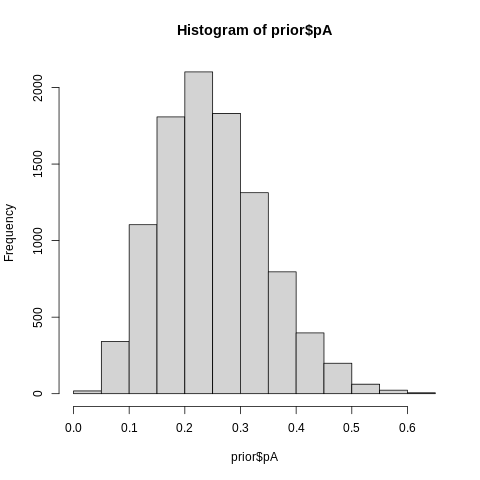

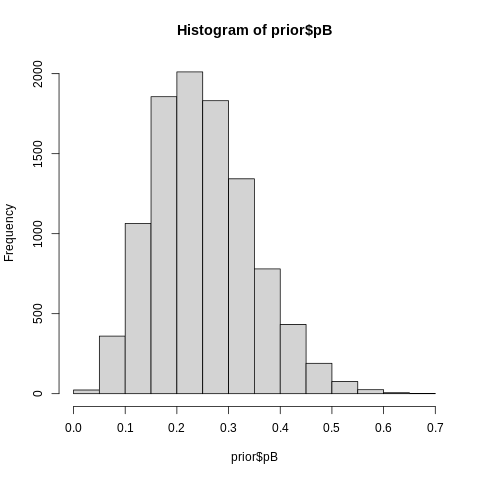

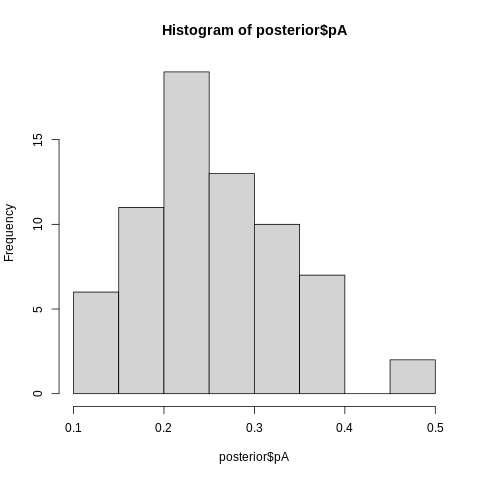

In [ ]:
%%R
#Number of random draws from the prior
n_draws <- 10000

# TODO Here you sample n_draws draws from the prior
# TODO name the columns pA and pB
# TODO use data.frame to store information for both methods   
prior <- data.frame(pA = rbeta(n_draws, 5, 15), pB = rbeta(n_draws, 5, 15))
hist(prior$pA)
hist(prior$pB)

# Here you define the generative model
generative_model <- function(pA, pB) {
  subscribersA <- rbinom(1, 16, pA)
  subscribersB <- rbinom(1, 16, pB)
  c(subscribersA = subscribersA, subscribersB = subscribersB)
}

# Here you simulate data using the parameters from the prior and the 
# generative model
sim_data <- rep(NA, n_draws)
# TODO complete new sim data
# TODO sim_data should be a dataframe to easily access its columns
# TODO in case it's easier, replace for with sapply
sim_data <- data.frame(t(sapply(1:n_draws, function(i) {
    generative_model(prior$pA[i], prior$pB[i])
})))

# Here you filter off all draws that do not match the data.
#TODO change the observed_data based on the prior data
posterior <- prior[sim_data$subscribersA == 4 & sim_data$subscribersB == 8, ] 

hist(posterior$pA) # Eyeball the posterior
length(posterior$pA) # See that we got enought draws left after the filtering.
                  # There are no rules here, but you probably want to aim
                  # for >1000 draws.

# Now you can summarize the posterior, where a common summary is to take the mean
median(posterior$pA)


## 3. Inferente statice
Folosind pașii din modelul de la 'Inferențe statistice', calculați intervalul de incredere (functia t.test) al medii coloanei disp (Displacement).
Pentru aceasta, folosind sample-uri cu 30% din intreaga populație.




In [ ]:
%%R


#start from mtcars
data(mtcars)
head(mtcars, 6)

#TODO

# reproducibility
set.seed(123)
# creating samples
mtcars_sample <- sample_frac(mtcars, .3)
t.test(mtcars_sample$disp)



	One Sample t-test

data:  mtcars_sample$disp
t = 5.5187, df = 9, p-value = 0.0003711
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 137.1608 327.7192
sample estimates:
mean of x 
   232.44 



Referințe:

[1] https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348

[2] https://www.r-bloggers.com/2019/04/understanding-bayesian-inference-with-a-simple-example-in-r/

[3] https://towardsdatascience.com/understanding-probability-and-statistics-statistical-inference-for-data-scientists-fd05bde7d63

[4] https://uc-r.github.io/univariate_inference

[5] http://www.sumsar.net/files/academia/user_2015_tutorial_bayesian_data_analysis_short_version.pdf